In [37]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np

In [2]:
crime_2014 = os.path.join("../Resources/Clean/crime_2014_clean.csv")
crime_2016 = os.path.join("../Resources/Clean/crime_2016_clean.csv")

crime_2014_df = pd.read_csv(crime_2014)
crime_2016_df = pd.read_csv(crime_2016)

In [3]:
crime_2014_df = crime_2014_df.drop(columns="Unnamed: 0")
crime_2016_df = crime_2016_df.drop(columns="Unnamed: 0")

In [4]:
crime_2014_df.head()

,Zip Code,GO Highest Offense Desc,UCR Description
0,"78,753",AGG ROBBERY/DEADLY WEAPON,Robbery
1,"78,723",ROBBERY BY ASSAULT,Robbery
2,"78,702",ROBBERY BY THREAT,Robbery
3,"78,723",AGG ROBBERY/DEADLY WEAPON,Robbery
4,"78,702",AGG ROBBERY/DEADLY WEAPON,Robbery


In [5]:
# Order By Zip Code & make the Zip Code Column a str and remove the comma

zip_crime_2014 = crime_2014_df.groupby(["Zip Code","UCR Description"])["GO Highest Offense Desc"].count().reset_index()
zip_crime_2014["Zip Code"] = zip_crime_2014["Zip Code"].astype(str)
zip_crime_2014["Zip Code"] = zip_crime_2014["Zip Code"].str.replace(",","")
zip_crime_2014= zip_crime_2014.rename(columns={"GO Highest Offense Desc":"Count of Offenses"})
zip_crime_2014.head()

,Zip Code,UCR Description,Count of Offenses
0,78613,Agg Assault,2
1,78613,Auto Theft,4
2,78613,Burglary,3
3,78613,Robbery,2
4,78613,Theft,393


In [6]:
# Order By Zip Code & make the Zip Code Column a str 

zip_crime_2016 = crime_2016_df.groupby(["Zip Code","UCR Description"])["GO Highest Offense Desc"].count().reset_index()
zip_crime_2016["Zip Code"] = zip_crime_2016["Zip Code"].astype(int).astype(str)
zip_crime_2016= zip_crime_2016.rename(columns={"GO Highest Offense Desc":"Count of Offenses"})
zip_crime_2016.head()

,Zip Code,UCR Description,Count of Offenses
0,78613,Auto Theft,12
1,78613,Burglary,8
2,78613,Murder,1
3,78613,Rape,3
4,78613,Robbery,2


### Get an Overview of Offenses Per Zipcode Between the Two Years

In [7]:
sum14 = pd.DataFrame(zip_crime_2014.groupby("Zip Code")["Count of Offenses"].sum().sort_values(ascending=False).reset_index())

sum16 = pd.DataFrame(zip_crime_2016.groupby("Zip Code")["Count of Offenses"].sum().sort_values(ascending=False).reset_index())

# Create DF and Change between the two years
summed = sum14.merge(sum16, on="Zip Code", suffixes= ("_14","_16"))
summed["Delta"] = summed["Count of Offenses_16"].subtract(other=summed["Count of Offenses_14"])

# Add Percentage Change Column
summed["Percentage"] = summed["Delta"].divide(other=summed["Count of Offenses_14"]).apply(lambda x: round(x,2))

### Because of graphing limitations, choose a small sample of zip codes

In [51]:
zips = ["78702","78722","78759","78753","78721","78750","78660","78742","78719","78757","78752"]
crime_2014_bar = pd.DataFrame()

for zipcode in zips:
    zipped = zip_crime_2014[zip_crime_2014["Zip Code"]==zipcode]
    crime_2014_bar = pd.concat([crime_2014_bar, zipped])

crime_2014_bar= crime_2014_bar.pivot(index="Zip Code",columns="UCR Description")["Count of Offenses"]

In [65]:
# Same but for 2016
zips = ["78702","78722","78759","78753","78721","78750","78660","78742","78719","78757","78752"]
crime_2016_bar = pd.DataFrame()

for zipcode in zips:
    zipped = zip_crime_2016[zip_crime_2016["Zip Code"]==zipcode]
    crime_2016_bar = pd.concat([crime_2016_bar, zipped])

crime_2016_bar= crime_2016_bar.pivot(index="Zip Code",columns="UCR Description")["Count of Offenses"]

In [64]:
# summed.sort_values(by="Percentage")

In [11]:
summed.to_csv("../Outputs/summed.csv")

### Plotting a Stacked Bar Chart

In [12]:
# zip_crime_2016["UCR Description"].unique()
zip_crime_2014["UCR Description"].unique()

array(['Agg Assault', 'Auto Theft', 'Burglary', 'Robbery', 'Theft',
       'Rape', 'Murder'], dtype=object)

In [50]:
offenses = ['Auto Theft', 'Burglary', 'Murder', 'Rape', 'Robbery', 'Theft',
       'Agg Assault']

UCR Description,Agg Assault,Auto Theft,Burglary,Murder,Rape,Robbery,Theft
Zip Code,,,,,,,
78660,7.0,6.0,16.0,1.0,NaN,3.0,113.0
78702,120.0,84.0,374.0,2.0,22.0,75.0,1519.0
78719,3.0,20.0,1.0,NaN,NaN,NaN,103.0
78721,67.0,19.0,146.0,NaN,9.0,23.0,375.0
78722,12.0,15.0,57.0,NaN,3.0,10.0,250.0
78742,4.0,2.0,11.0,NaN,2.0,NaN,27.0
78750,16.0,14.0,72.0,2.0,4.0,7.0,294.0
78752,101.0,82.0,162.0,NaN,23.0,49.0,904.0
78753,184.0,219.0,440.0,4.0,58.0,111.0,2919.0


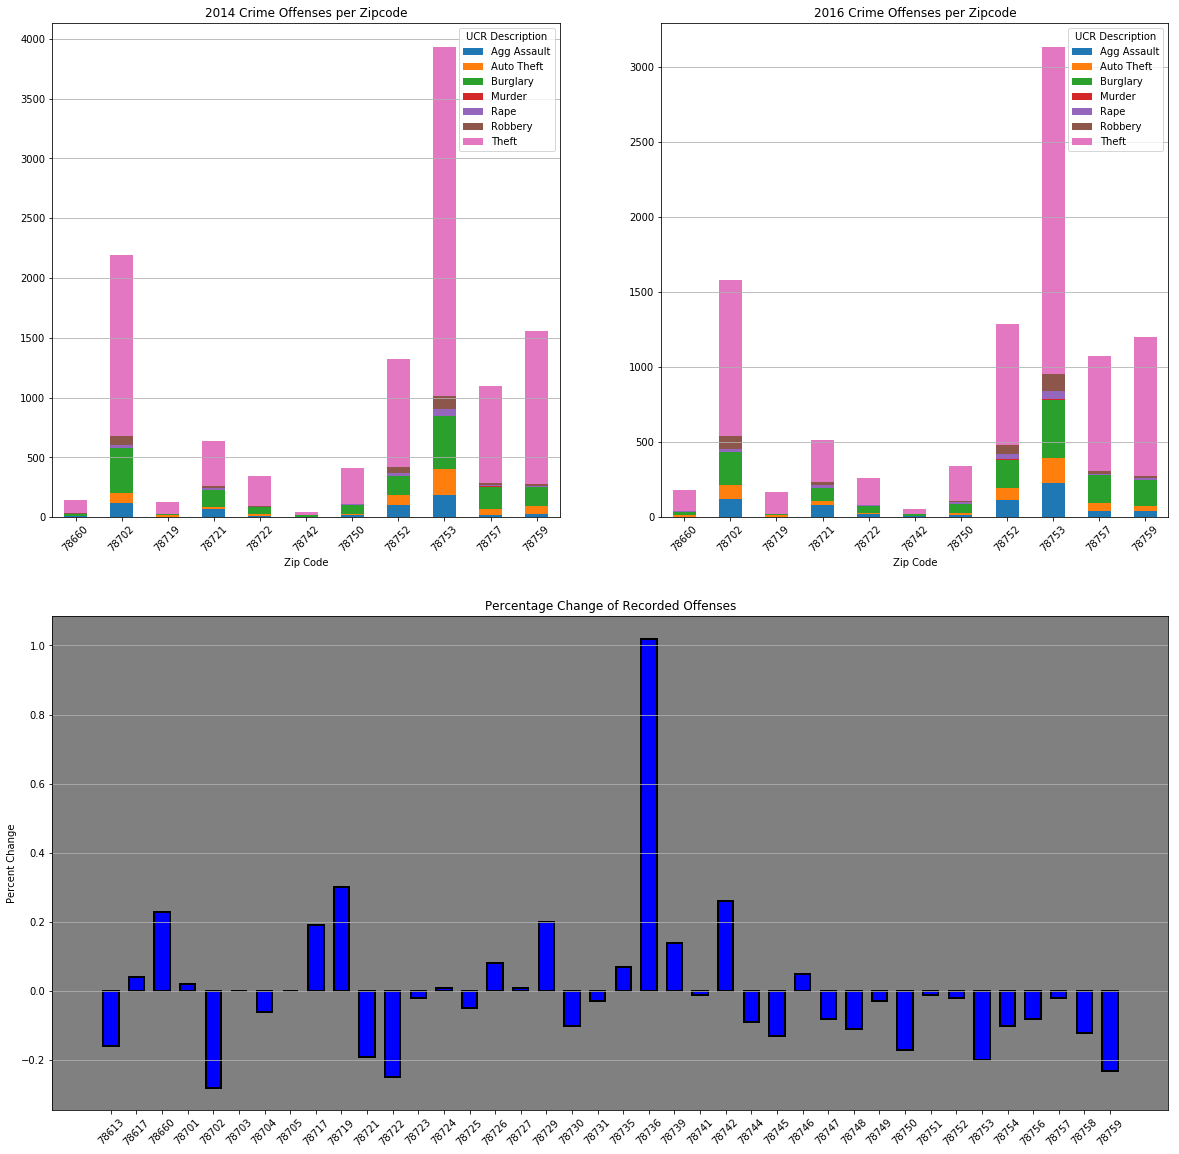

In [63]:
plt.figure(figsize=(20,20))

# First figure
ax1 = plt.subplot(2,2,1)

crime_2014_bar.plot.bar(stacked=True,ax=ax1)
plt.title("2014 Crime Offenses per Zipcode")
plt.xticks(rotation=45)
ax1.yaxis.grid()
# ax1.set_facecolor("grey")

# Second figure
ax2 = plt.subplot(2,2,2)

crime_2016_bar.plot.bar(stacked=True,ax=ax2)
plt.title("2016 Crime Offenses per Zipcode")
plt.xticks(rotation=45)
ax2.yaxis.grid()
# ax2.set_facecolor("grey")

# Third figure
ax3 = plt.subplot2grid((2,2), (1,0), colspan=2)
plt.title("Percentage Change of Recorded Offenses")
plt.ylabel("Percent Change")
ax3.bar(summed["Zip Code"], summed["Percentage"], width=0.6,color="blue",edgecolor="black",linewidth=2)
plt.xticks(rotation=45)
ax3.yaxis.grid()
ax3.set_facecolor("grey")

plt.show()